In [419]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox,zscore
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,classification_report,confusion_matrix,accuracy_score
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.impute import SimpleImputer
import mysql.connector as connector
import sys
import joblib as joblib

In [420]:
#connecting to mysql and loading csv file done here
try:
    conn=connector.connect(host='localhost',username='root',password='root',port='3306',database='DATATRAINED')
    cursor=conn.cursor()
    cursor.execute("load data infile 'C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/Student_Mark.csv' into table STUDENT_MARK fields terminated by ',' lines terminated by '\n' ignore 1 lines ;")
    print('successfully loaded csv file to db')
    conn.commit()
    df=pd.read_sql('select * from STUDENT_MARK',conn)
    print(df)
    conn.close()

except Exception as e:
    print("Error in db operation ",e)
    sys.exit(1)

successfully loaded csv file to db
       Name Gender         DOB  Maths  Physics  Chemistry  English  Biology  \
0      John      M  05-04-1988     55       45         56       87       21   
1    Suresh      M  04-05-1987     75       96         78       64       90   
2    Ramesh      M  25-05-1989     25       54         89       76       95   
3   Jessica      F  12-08-1990     78       96         86       63       54   
4  Jennifer      F  02-09-1989     58       96         78       46       96   
5      Annu      F  05-04-1988     45       87         52       89       55   
6     pooja      F  04-05-1987     55       64         61       58       75   
7    Ritesh      M  25-05-1989     54       76         87       56       25   
8     Farha      F  12-08-1990     55       63         89       75       78   
9    Mukesh      M  02-09-1989     96       46         77       83       58   

   Economics  History  Civics  
0         52       89      65  
1         61       58       2  

In [421]:
#showing all data types for each column
#we have 3 string data type .
df.dtypes

Name         object
Gender       object
DOB          object
Maths         int64
Physics       int64
Chemistry     int64
English       int64
Biology       int64
Economics     int64
History       int64
Civics        int64
dtype: object

In [422]:
#print no of rows and columns
df.shape

(10, 11)

In [423]:
#check any null value presents or not
df.isnull().sum()

Name         0
Gender       0
DOB          0
Maths        0
Physics      0
Chemistry    0
English      0
Biology      0
Economics    0
History      0
Civics       0
dtype: int64

In [424]:
#check any 0 value present or not .If present then replace with mean value
df.isin([0]).sum()

Name         0
Gender       0
DOB          0
Maths        0
Physics      0
Chemistry    0
English      0
Biology      0
Economics    0
History      0
Civics       0
dtype: int64

In [425]:
#Start EDA process
#print distinct value of Gender column
df['Gender'].unique()

array(['M', 'F'], dtype=object)

Text(0, 0.5, 'Marks')

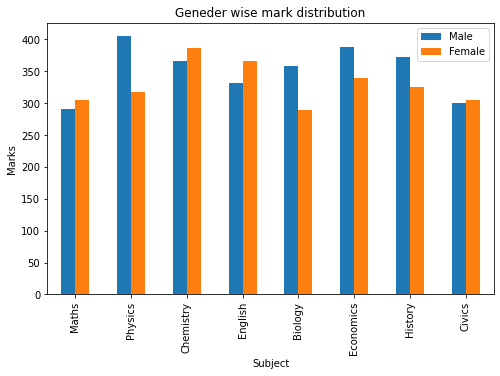

In [426]:
#Graph of gender wise mark distribution
gender_wise_df=df.groupby(['Gender']).agg({'Maths':'sum','Physics':'sum','Chemistry':'sum','English':'sum','Biology':'sum','Economics':'sum','History':'sum','Civics':'sum'}).reset_index()
#converting columns into rows .Now column header are indexes .
gender_wise_df_t=gender_wise_df.T
#removing Gender row because it is not required in graph
gender_wise_df_t=gender_wise_df_t.drop('Gender',axis=0)
#naming column index
gender_wise_df_t.columns=['Male','Female']

#finally plotting the bar graph
gender_wise_df_t.plot(kind='bar',figsize=(8,5))
plt.title('Geneder wise mark distribution')
plt.xlabel('Subject')
plt.ylabel('Marks')

#from below graph we conclude that girls did good in Maths,Chemistry,English and civis compare to boys
#and boys did well in Physics,Biology,History,economics comapre to girl



Gender
F    2812
M    2633
dtype: int64
<class 'pandas.core.series.Series'>


Text(0, 0.5, 'Total Mark')

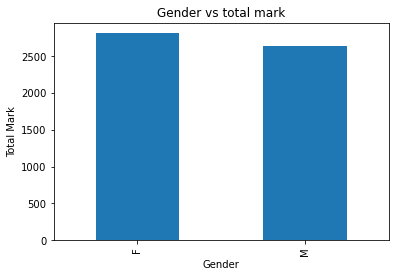

In [427]:
gender_wise_df_i=gender_wise_df.set_index('Gender')
gender_wise_df_i=gender_wise_df_i.sum(axis=1)
print(gender_wise_df_i)
print(type(gender_wise_df_i))
gender_wise_df_i.plot(kind='bar')
plt.title('Gender vs total mark')
plt.xlabel('Gender')
plt.ylabel('Total Mark')
#Girls scored better than boys in total

In [428]:
df

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
0,John,M,05-04-1988,55,45,56,87,21,52,89,65
1,Suresh,M,04-05-1987,75,96,78,64,90,61,58,2
2,Ramesh,M,25-05-1989,25,54,89,76,95,87,56,74
3,Jessica,F,12-08-1990,78,96,86,63,54,89,75,45
4,Jennifer,F,02-09-1989,58,96,78,46,96,77,83,53
5,Annu,F,05-04-1988,45,87,52,89,55,89,87,52
6,pooja,F,04-05-1987,55,64,61,58,75,58,64,61
7,Ritesh,M,25-05-1989,54,76,87,56,25,56,76,87
8,Farha,F,12-08-1990,55,63,89,75,78,75,63,89
9,Mukesh,M,02-09-1989,96,46,77,83,58,83,46,77


In [429]:
df_T=df.T
df_T

,0,1,2,3,4,5,6,7,8,9
Name,John,Suresh,Ramesh,Jessica,Jennifer,Annu,pooja,Ritesh,Farha,Mukesh
Gender,M,M,M,F,F,F,F,M,F,M
DOB,05-04-1988,04-05-1987,25-05-1989,12-08-1990,02-09-1989,05-04-1988,04-05-1987,25-05-1989,12-08-1990,02-09-1989
Maths,55,75,25,78,58,45,55,54,55,96
Physics,45,96,54,96,96,87,64,76,63,46
Chemistry,56,78,89,86,78,52,61,87,89,77
English,87,64,76,63,46,89,58,56,75,83
Biology,21,90,95,54,96,55,75,25,78,58
Economics,52,61,87,89,77,89,58,56,75,83
History,89,58,56,75,83,87,64,76,63,46


In [430]:
df_T.index

Index(['Name', 'Gender', 'DOB', 'Maths', 'Physics', 'Chemistry', 'English',
       'Biology', 'Economics', 'History', 'Civics'],
      dtype='object')

In [431]:
df_T.columns

RangeIndex(start=0, stop=10, step=1)

In [432]:
#printing 1st row values
df_T.iloc[0].values

array(['John', 'Suresh', 'Ramesh', 'Jessica', 'Jennifer', 'Annu', 'pooja',
       'Ritesh', 'Farha', 'Mukesh'], dtype=object)

In [433]:
#setting first row values as column name
df_T.columns=df_T.iloc[0].values
df_T

,John,Suresh,Ramesh,Jessica,Jennifer,Annu,pooja,Ritesh,Farha,Mukesh
Name,John,Suresh,Ramesh,Jessica,Jennifer,Annu,pooja,Ritesh,Farha,Mukesh
Gender,M,M,M,F,F,F,F,M,F,M
DOB,05-04-1988,04-05-1987,25-05-1989,12-08-1990,02-09-1989,05-04-1988,04-05-1987,25-05-1989,12-08-1990,02-09-1989
Maths,55,75,25,78,58,45,55,54,55,96
Physics,45,96,54,96,96,87,64,76,63,46
Chemistry,56,78,89,86,78,52,61,87,89,77
English,87,64,76,63,46,89,58,56,75,83
Biology,21,90,95,54,96,55,75,25,78,58
Economics,52,61,87,89,77,89,58,56,75,83
History,89,58,56,75,83,87,64,76,63,46


In [434]:
#remove 1st,2nd and 3rd row 
df_T=df_T.drop(['Name'],axis=0)
df_T
df_T=df_T.drop(['Gender','DOB'],axis=0)


In [435]:
df_T

,John,Suresh,Ramesh,Jessica,Jennifer,Annu,pooja,Ritesh,Farha,Mukesh
Maths,55,75,25,78,58,45,55,54,55,96
Physics,45,96,54,96,96,87,64,76,63,46
Chemistry,56,78,89,86,78,52,61,87,89,77
English,87,64,76,63,46,89,58,56,75,83
Biology,21,90,95,54,96,55,75,25,78,58
Economics,52,61,87,89,77,89,58,56,75,83
History,89,58,56,75,83,87,64,76,63,46
Civics,65,2,74,45,53,52,61,87,89,77


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000027E6FC7E7C0>,
      dtype=object)

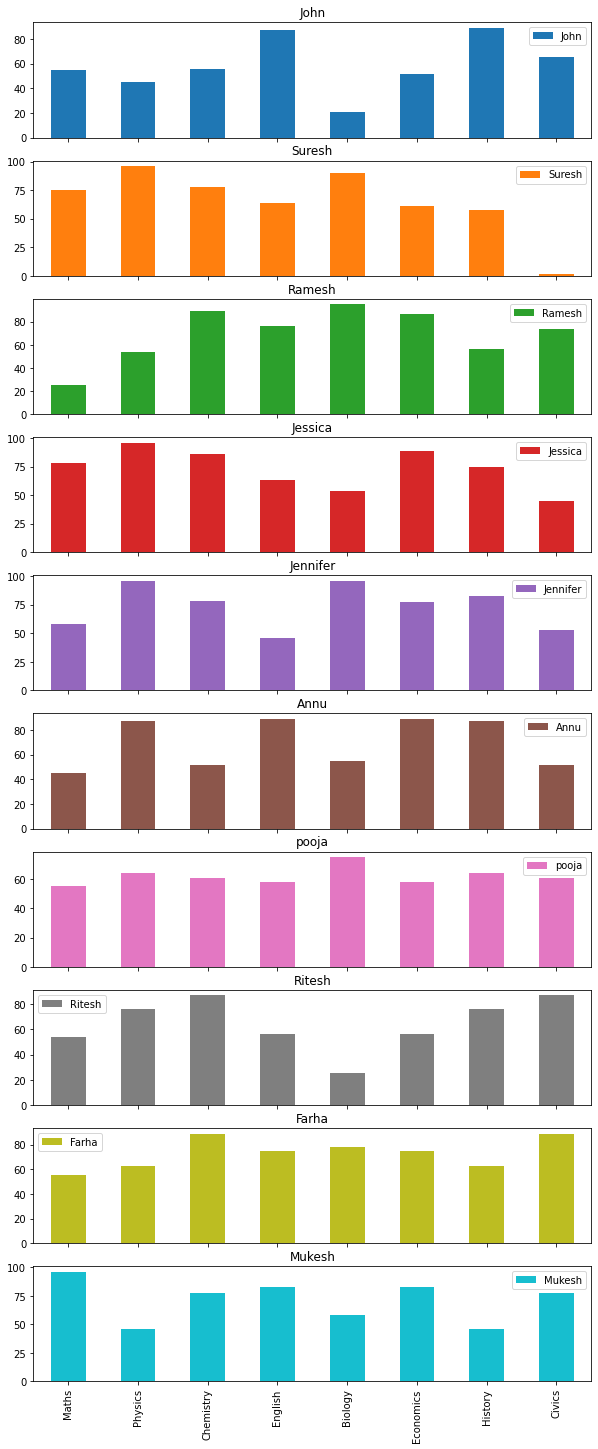

In [436]:
#ploting bar graph of marks for each student 
df_T.plot(kind='bar',subplots=True,figsize=(10,25))


In [437]:
df_T

,John,Suresh,Ramesh,Jessica,Jennifer,Annu,pooja,Ritesh,Farha,Mukesh
Maths,55,75,25,78,58,45,55,54,55,96
Physics,45,96,54,96,96,87,64,76,63,46
Chemistry,56,78,89,86,78,52,61,87,89,77
English,87,64,76,63,46,89,58,56,75,83
Biology,21,90,95,54,96,55,75,25,78,58
Economics,52,61,87,89,77,89,58,56,75,83
History,89,58,56,75,83,87,64,76,63,46
Civics,65,2,74,45,53,52,61,87,89,77


In [438]:
df_sum=df_T.sum(axis=0)
df_sum

John        470.0
Suresh      524.0
Ramesh      556.0
Jessica     586.0
Jennifer    587.0
Annu        556.0
pooja       496.0
Ritesh      517.0
Farha       587.0
Mukesh      566.0
dtype: float64

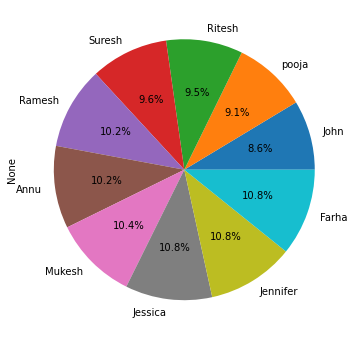

In [439]:
#from below graph it is clear that Farha,Jennifer,jessica scored more than other students
#df_sum.sort_values().plot(kind='bar')
df_sum.sort_values().plot(kind='pie',autopct='%1.1f%%',figsize=(6,6))

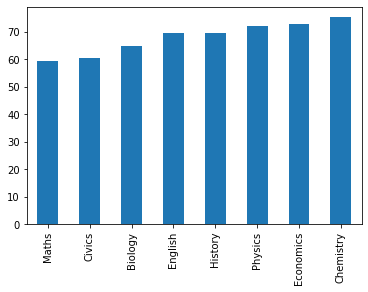

In [440]:
#find avg score in each subject
df_mean=df_T.mean(axis=1)
df_mean.sort_values().plot(kind='bar')
#Students did good in Chemistry and score low mark in maths

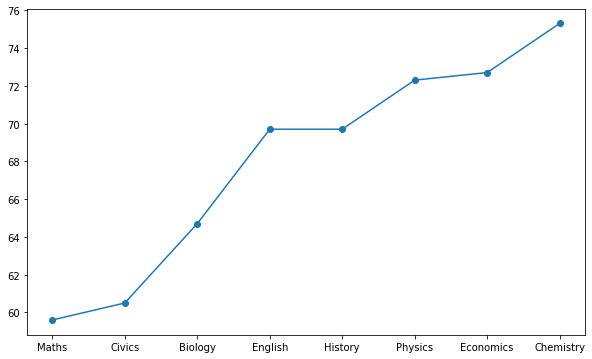

In [441]:
#Students did good in Chemistry and score low mark in maths.Using line plot
df_mean.sort_values().plot(kind='line',figsize=(10,6), marker='o')